In [1]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import os
import numpy 

root = Path('../checkpoints')

In [2]:
def get_vs_arch_scores(top_k_list):
    scores = {'loss': list(), 'Recall@1': list(), 'Recall@5': list(), 'Recall@20': list()}
    lr_str = '1e-7'
    for top_k in top_k_list:
        dir_path = root / 'sample' / '5000-3000-400-400-400' / f'top{top_k}' / lr_str
        file_name = [x for x in os.listdir(dir_path) if x.startswith('best_checkpoint_')][0]
        checkpoints = torch.load(dir_path / file_name, 'cpu')
        for m in scores.keys():
            scores[m].append(checkpoints['dev_metrics_scores'][m])
    scores['top_k'] = top_k_list
    return scores

In [3]:
def plot_subgraph(scores, logscale, title):
    fig, ax = plt.subplots(2, 2, figsize=(10, 10))
    ax[0,0].plot(scores[title], scores['loss'])
    ax[0,0].set_title(f'loss vs {title}')
    
    ax[0,1].plot(scores[title], scores['Recall@1'])
    ax[0,1].set_title(f'Recall@1 vs {title}')

    ax[1,0].plot(scores[title], scores['Recall@5'])
    ax[1,0].set_title(f'Recall@5 vs {title}')
   
    ax[1,1].plot(scores[title], scores['Recall@20'])
    ax[1,1].set_title(f'Recall@20 vs {title}')
    
    if logscale:
        ax[0,0].set_xscale('log')
        ax[0,1].set_xscale('log')
        ax[1,0].set_xscale('log')
        ax[1,1].set_xscale('log')
    
    for a in ax:
        for b in a:
            b.set_xlabel(title)
    ax[0,0].set_ylabel('loss')
    ax[0,1].set_ylabel('Recall@1')
    ax[1,0].set_ylabel('Recall@5')
    ax[1,1].set_ylabel('Recall@20')
    fig.tight_layout()

In [4]:
scores = get_vs_arch_scores([1968, 1970, 1972, 1974, 1976, 1978, 1980, 1982, 1984, 1986, 1988, 1990, 1992, 1994, 1996, 1998])

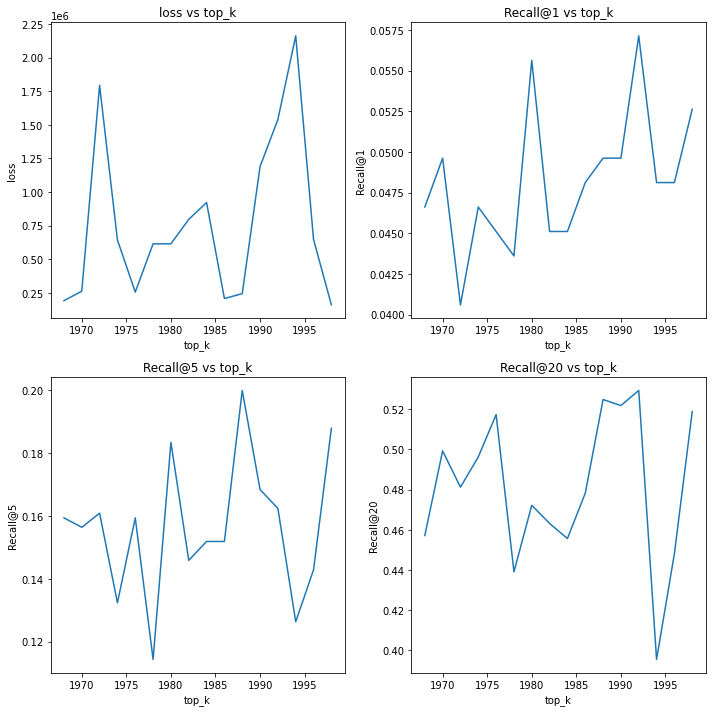

In [5]:
plot_subgraph(scores, False, 'top_k')

In [ ]:
shortcut-sample